In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import sklearn as metrics
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")

In [3]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>],


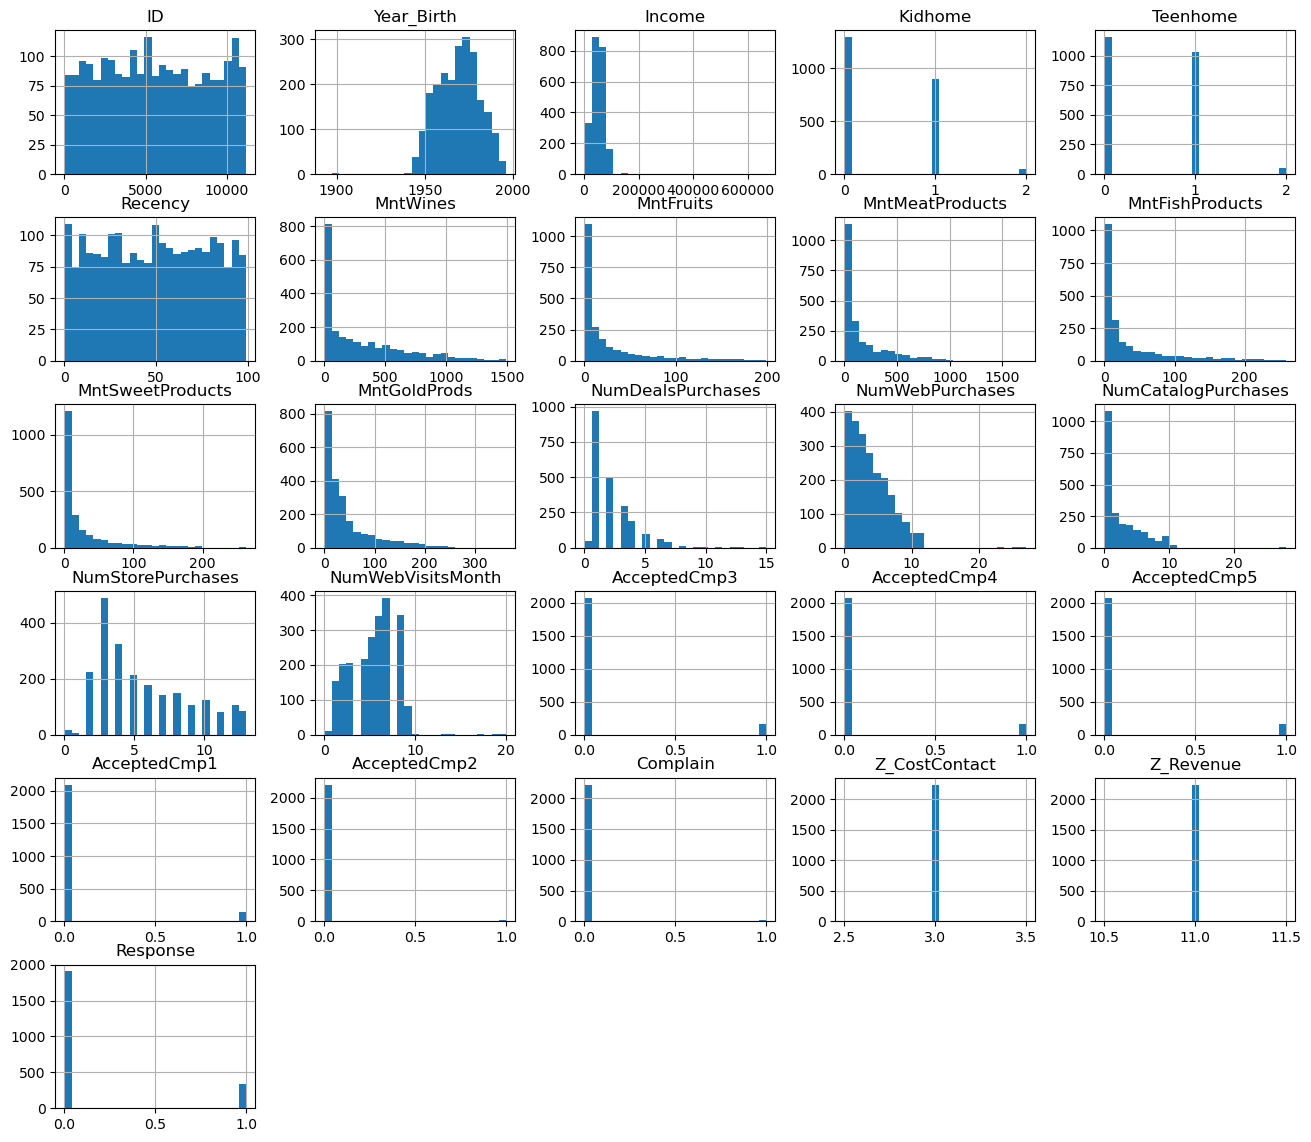

In [5]:
df.hist(figsize=(16,14),bins=25)

In [6]:
df = df.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'])

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>],
       [<Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>],
       [<Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>],
       [<Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

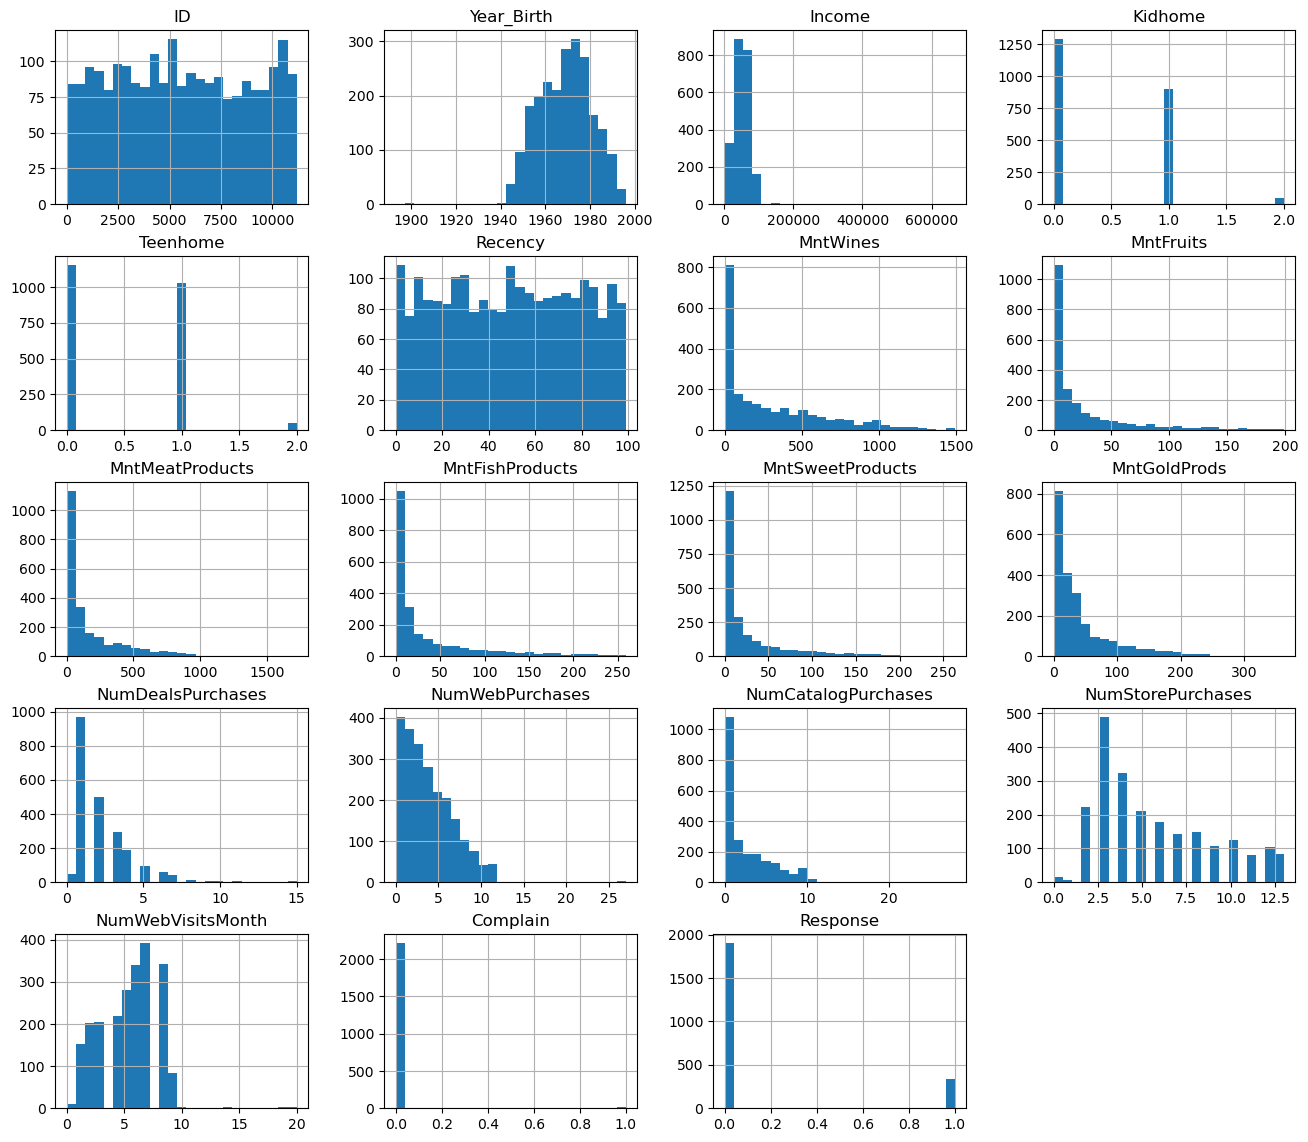

In [7]:
df.hist(figsize=(16,14),bins=25)

In [8]:
df = df.dropna(subset=['Income'])

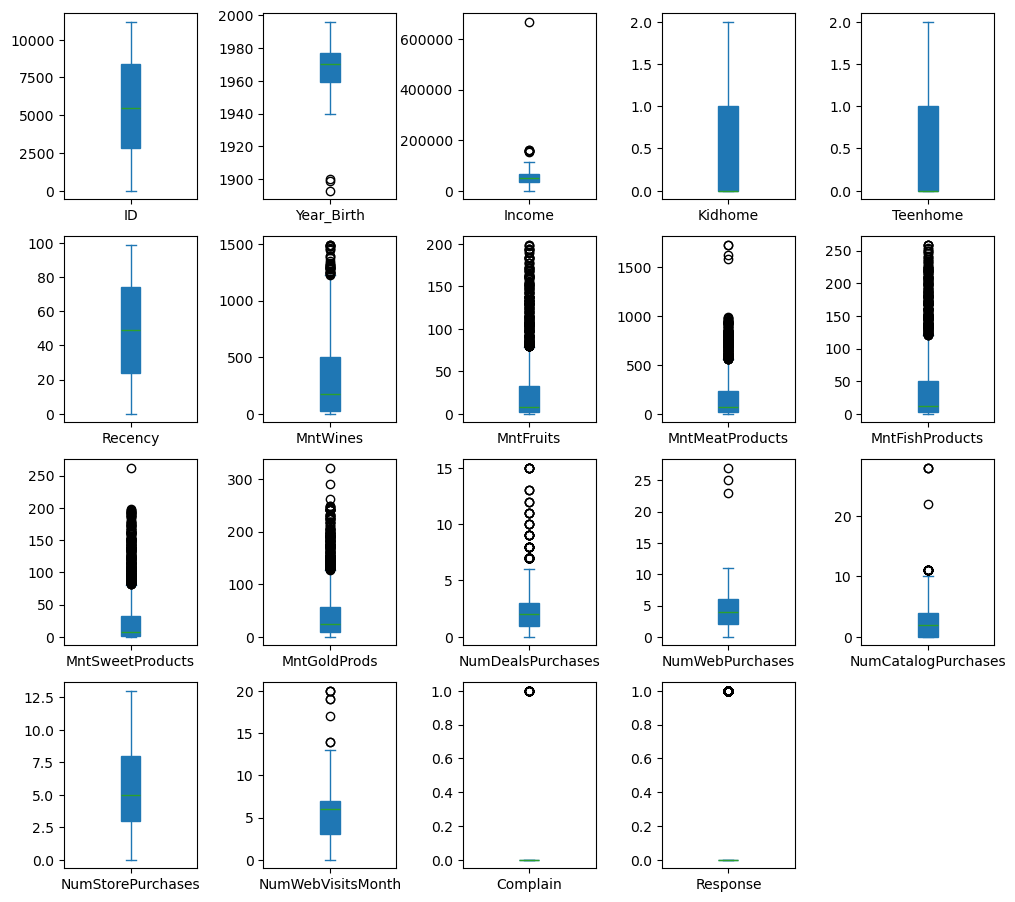

In [9]:
df.plot(subplots=True,layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [10]:
unique_early_years = df[df['Year_Birth'] < 1940]['Year_Birth'].unique()
print(sorted(unique_early_years))

[1893, 1899, 1900]


In [11]:
df = df[df['Year_Birth'] > 1900]

In [12]:
wealthy = df[df['Income'] > 200000 ]['Income'].unique()
print(sorted(wealthy))

[666666.0]


In [13]:
df = df[df['Income'] <= 200000]

In [14]:
col = ['Education','Marital_Status']
for col in col:
    print(df[col].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [15]:
df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO','Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd','Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

In [16]:
col = ['Education','Marital_Status']
for col in col:
    print(df[col].unique())

['Graduation' 'PhD' 'Master' 'Basic']
['Single' 'Married' 'Divorced' 'Widow']


In [17]:
education_mapping = {
    'Basic': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
df['Education_Encoded'] = df['Education'].map(education_mapping)

In [18]:
marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital', drop_first=True) # divorced is the reference 
df = pd.concat([df, marital_dummies], axis=1)

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Tenure'] = ((datetime.now() - df['Dt_Customer']).dt.days / 365.25).astype(int)

In [20]:
ty = datetime.now().year
df['Signup_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [21]:
df = df.drop(columns = ['Education', 'Marital_Status', 'Dt_Customer', 'ID', 'Year_Birth'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Kidhome              2212 non-null   int64  
 2   Teenhome             2212 non-null   int64  
 3   Recency              2212 non-null   int64  
 4   MntWines             2212 non-null   int64  
 5   MntFruits            2212 non-null   int64  
 6   MntMeatProducts      2212 non-null   int64  
 7   MntFishProducts      2212 non-null   int64  
 8   MntSweetProducts     2212 non-null   int64  
 9   MntGoldProds         2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  Complain             2212 non-null   int64 

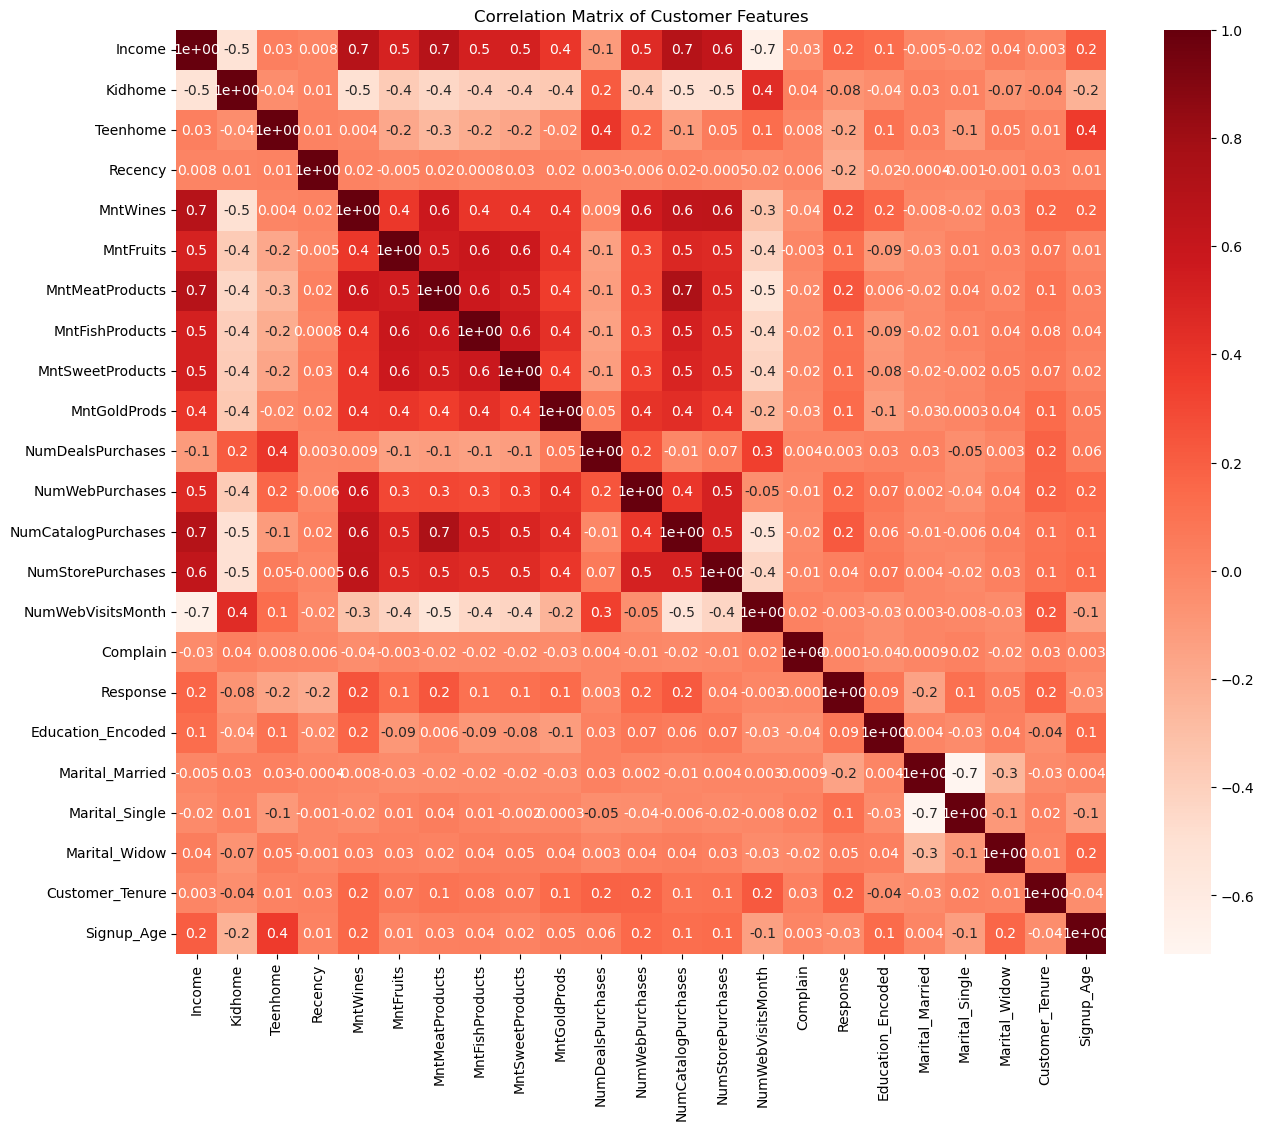

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".1")
plt.title("Correlation Matrix of Customer Features")
plt.show()

In [24]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']
df['Family_Size'] = df['Kidhome'] + df['Teenhome']

In [25]:
df = df.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Kidhome', 'Teenhome'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Recency              2212 non-null   int64  
 2   MntGoldProds         2212 non-null   int64  
 3   NumDealsPurchases    2212 non-null   int64  
 4   NumWebPurchases      2212 non-null   int64  
 5   NumCatalogPurchases  2212 non-null   int64  
 6   NumStorePurchases    2212 non-null   int64  
 7   NumWebVisitsMonth    2212 non-null   int64  
 8   Complain             2212 non-null   int64  
 9   Response             2212 non-null   int64  
 10  Education_Encoded    2212 non-null   int64  
 11  Marital_Married      2212 non-null   bool   
 12  Marital_Single       2212 non-null   bool   
 13  Marital_Widow        2212 non-null   bool   
 14  Customer_Tenure      2212 non-null   int32  
 15  Signup_Age           2212 non-null   int64 

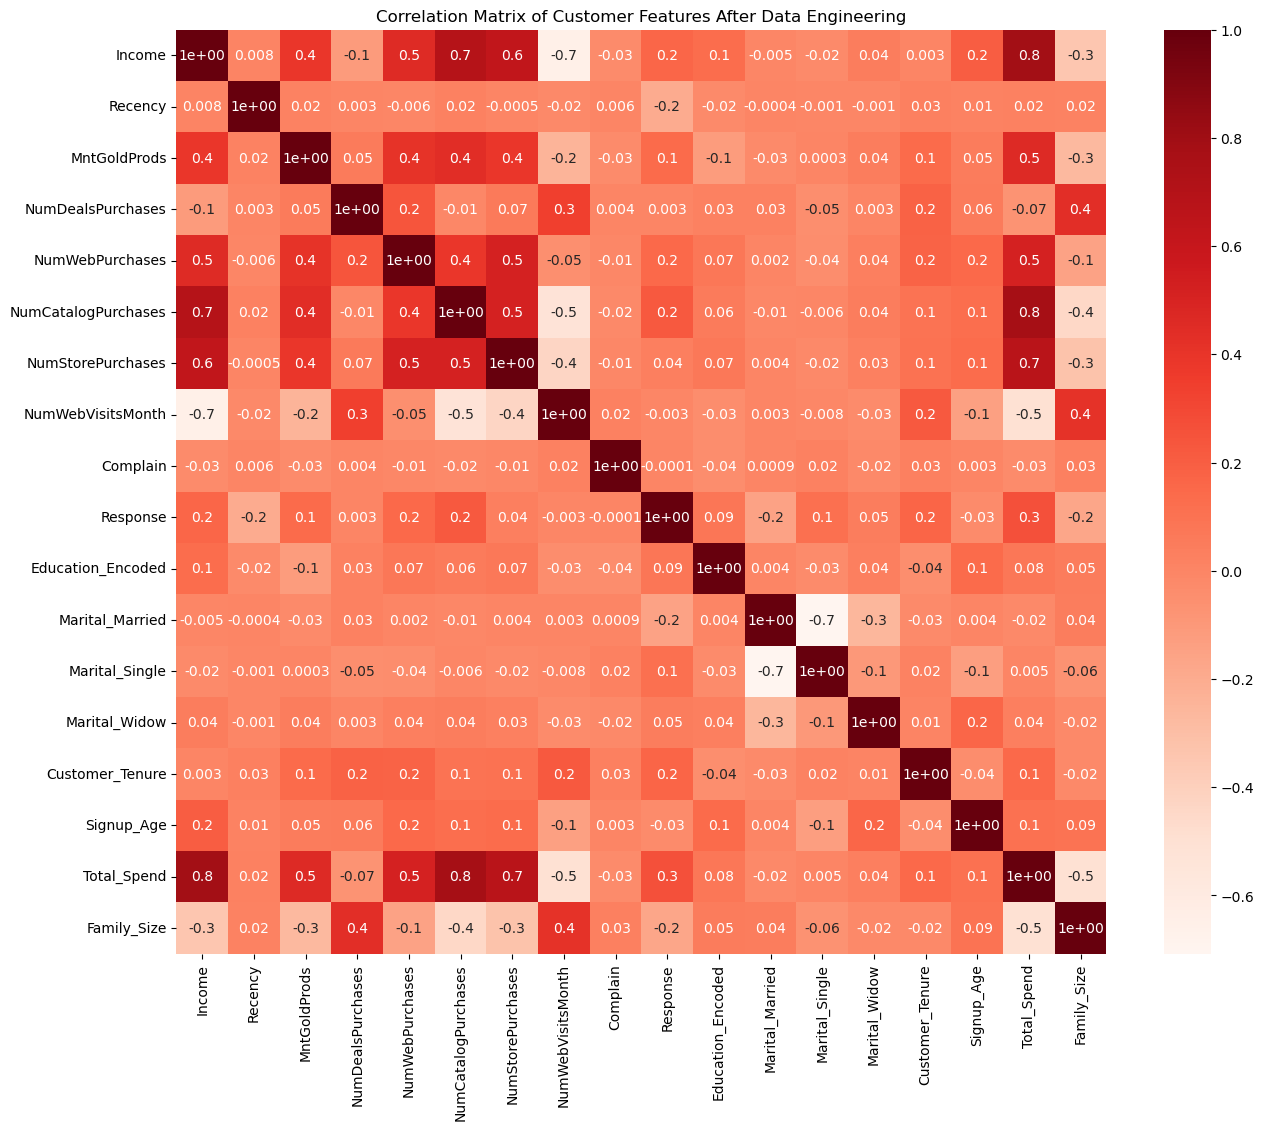

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".1")
plt.title("Correlation Matrix of Customer Features After Data Engineering")
plt.show()

In [28]:
# regression model 
y=df['Response']
x=df.drop(columns=['Response'])
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=56)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

In [29]:
print(model.score(x_train, y_train))

0.8547201808931599


In [30]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8555304740406321

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       375
           1       0.57      0.25      0.35        68

    accuracy                           0.86       443
   macro avg       0.72      0.61      0.63       443
weighted avg       0.83      0.86      0.83       443



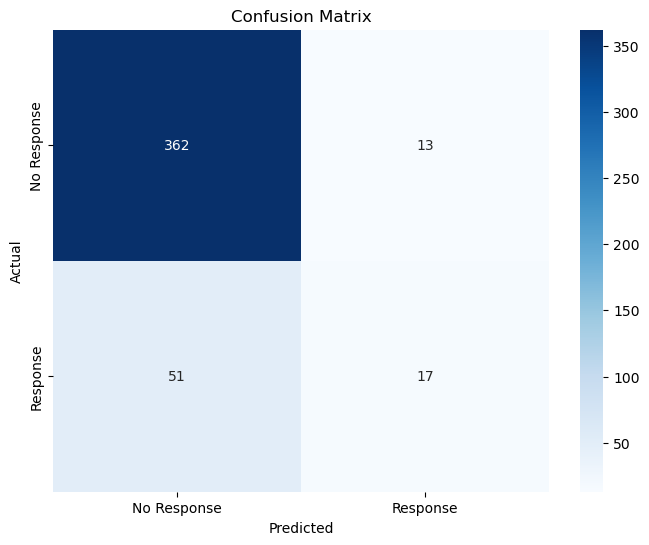

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Response', 'Response'], 
            yticklabels=['No Response', 'Response'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Top 10 Most Important Features:
                feature  coefficient  abs_coefficient
6     NumStorePurchases    -0.137325         0.137325
5   NumCatalogPurchases     0.073700         0.073700
7     NumWebVisitsMonth     0.061740         0.061740
4       NumWebPurchases     0.049309         0.049309
10      Marital_Married    -0.045513         0.045513
9     Education_Encoded     0.033174         0.033174
1               Recency    -0.025217         0.025217
11       Marital_Single     0.021777         0.021777
3     NumDealsPurchases     0.021112         0.021112
13      Customer_Tenure    -0.020324         0.020324


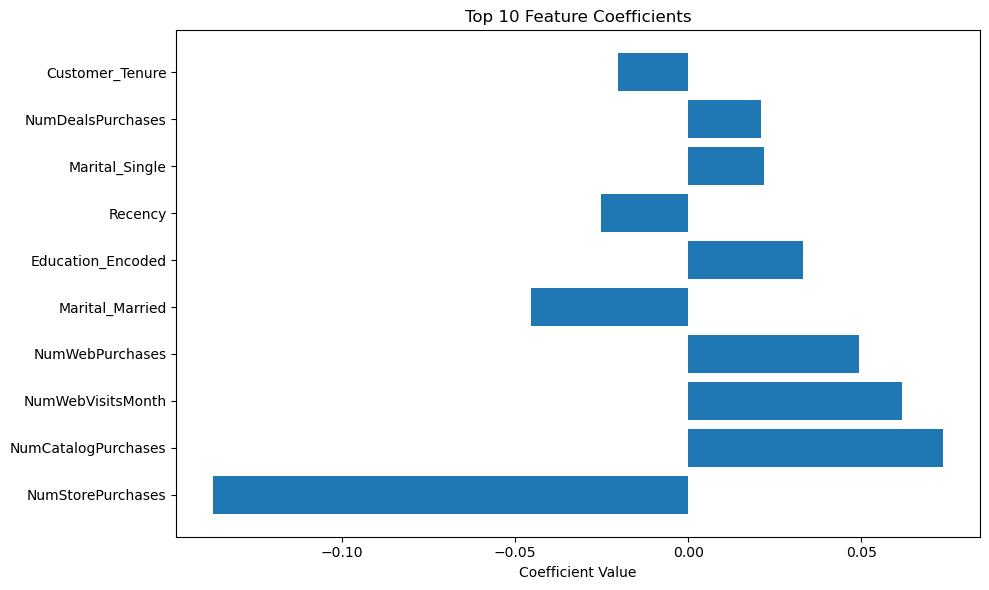

In [33]:
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': model.coef_[0],
    'abs_coefficient': np.abs(model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualization
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['coefficient'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients')
plt.tight_layout()
plt.show()

In [34]:
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
Response
0    0.850198
1    0.149802
Name: proportion, dtype: float64

Test set class distribution:
Response
0    0.846501
1    0.153499
Name: proportion, dtype: float64


In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [36]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=0, probability=True)
svm_model.fit(x_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [37]:
# Make predictions
y_pred_svm = svm_model.predict(x_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(x_test_scaled)[:, 1]


In [38]:
print("SVM Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_svm):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Model Results:
Accuracy: 0.860
AUC: 0.839

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       375
           1       0.67      0.18      0.28        68

    accuracy                           0.86       443
   macro avg       0.77      0.58      0.60       443
weighted avg       0.84      0.86      0.82       443



In [39]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for your SVM model
perm_importance = permutation_importance(
    svm_model,           # Your trained SVM
    x_test_scaled,       # Scaled test features
    y_test,              # Test targets
    n_repeats=10,        # Number of times to shuffle each feature
    random_state=42,
    scoring='f1'         # Use F1 since you have imbalanced data
)

# Create results dataframe
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Most Significant Variables in SVM:")
print("="*50)
print(importance_df.head(10))

Most Significant Variables in SVM:
                feature  importance_mean  importance_std
16          Family_Size         0.145776        0.033200
15          Total_Spend         0.110874        0.045604
0                Income         0.099077        0.036195
10      Marital_Married         0.048743        0.042234
5   NumCatalogPurchases         0.031669        0.024037
3     NumDealsPurchases         0.021733        0.024478
1               Recency         0.020752        0.052835
2          MntGoldProds         0.009157        0.032460
4       NumWebPurchases         0.006986        0.024742
12        Marital_Widow         0.003064        0.008708


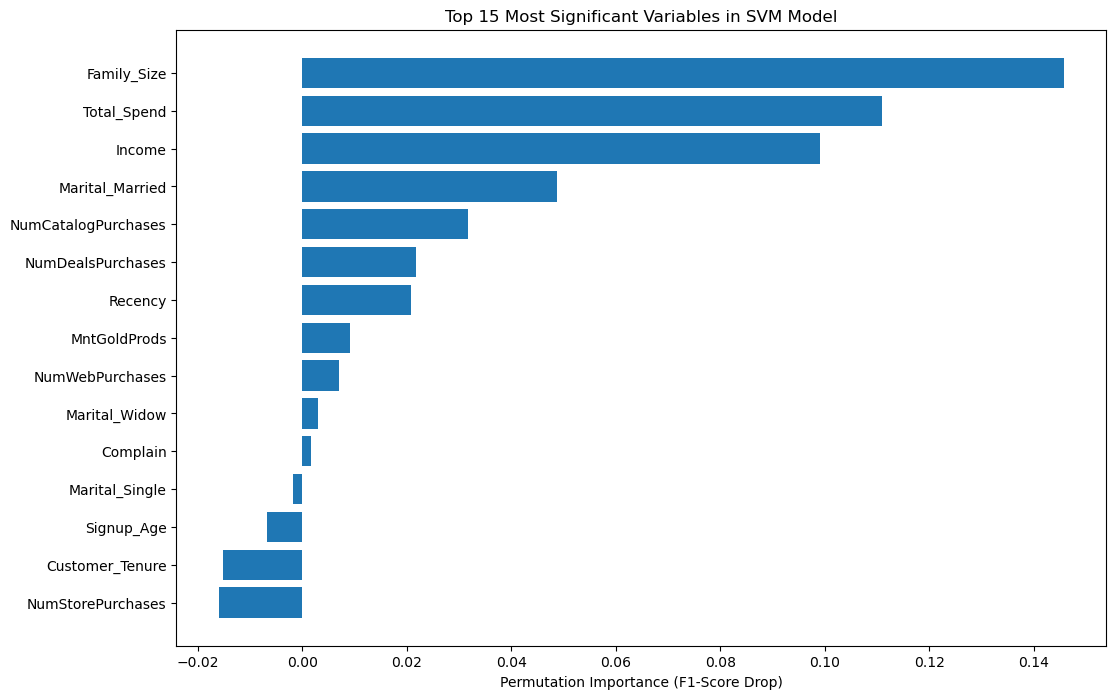

In [40]:
# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['importance_mean'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Permutation Importance (F1-Score Drop)')
plt.title('Top 15 Most Significant Variables in SVM Model')
plt.gca().invert_yaxis() 